<a href="https://colab.research.google.com/github/Manoj250/Respiratory-disorder-detection-with-deep-learning-/blob/main/covidXray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle -q

In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manojdb","key":"20370af0140aa19f9b1ba28efbee5176"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d khoongweihao/covid19-xray-dataset-train-test-sets

100% 84.0M/84.3M [00:01<00:00, 82.2MB/s]
100% 84.3M/84.3M [00:01<00:00, 76.5MB/s]


In [ ]:
!unzip "/content/covid19-xray-dataset-train-test-sets.zip"

(1224, 1762)


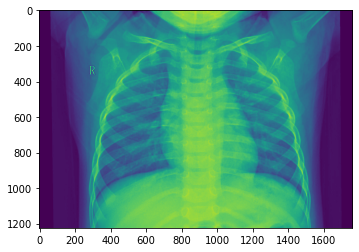

In [ ]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt


img_normal = Image.open("/content/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg")
arr = asarray(img_normal)
print(arr.shape)
plt.imshow(arr)

(1474, 1692)


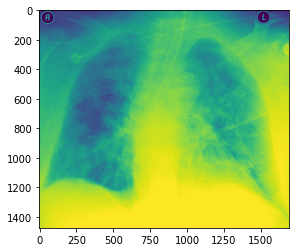

In [ ]:
img_abnormal = Image.open("/content/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg")
arr = asarray(img_abnormal)
print(arr.shape)
plt.imshow(arr)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=45,
    fill_mode='nearest'
    )

# test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    '/content/xray_dataset_covid19/train',
    target_size=(224,224),
    batch_size=6,
    class_mode='binary',
    shuffle=True,
    # color_mode="grayscale"
    )

validation_generator = datagen.flow_from_directory(
    '/content/xray_dataset_covid19/test',
    target_size=(224,224),
    batch_size=6,
    class_mode='binary',
    shuffle=True,
    # color_mode="grayscale"
    )

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.core import Dropout

from tensorflow import keras

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224,224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

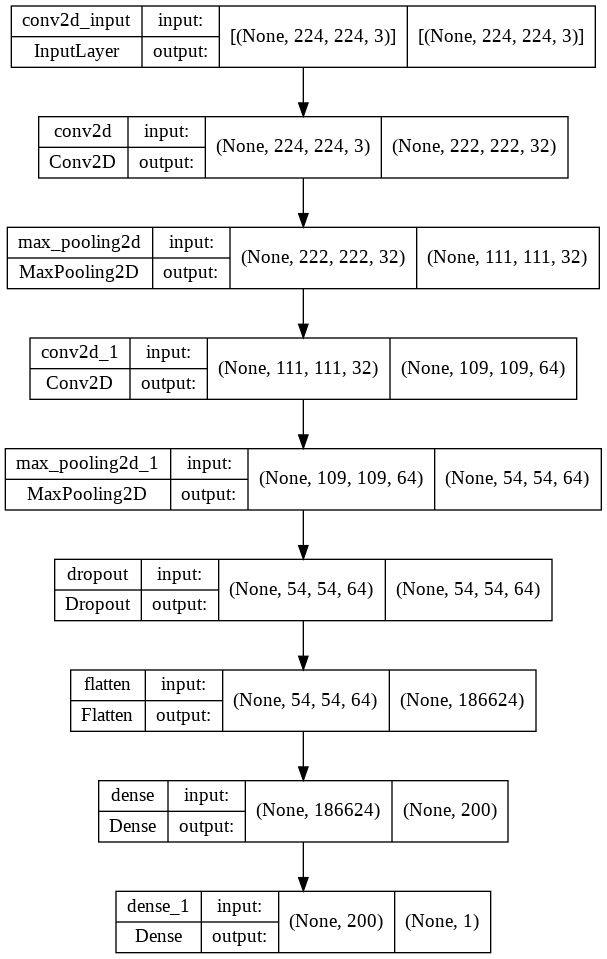

In [ ]:
from tensorflow.keras.utils import plot_model as plotter
plotter(model, to_file="arch.png", show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(
        train_generator,
        steps_per_epoch=148/6,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=40/6,verbose=1)

Epoch 1/10
24/24 [==============================] - 33s 1s/step - loss: 1.1007 - accuracy: 0.5946 - val_loss: 0.5855 - val_accuracy: 0.7000
Epoch 2/10
24/24 [==============================] - 26s 1s/step - loss: 0.4964 - accuracy: 0.7297 - val_loss: 0.2246 - val_accuracy: 0.9000
Epoch 3/10
24/24 [==============================] - 26s 1s/step - loss: 0.4478 - accuracy: 0.8041 - val_loss: 0.2560 - val_accuracy: 0.9500
Epoch 4/10
24/24 [==============================] - 26s 1s/step - loss: 0.3893 - accuracy: 0.8311 - val_loss: 0.2404 - val_accuracy: 0.9500
Epoch 5/10
24/24 [==============================] - 26s 1s/step - loss: 0.3937 - accuracy: 0.8446 - val_loss: 0.3114 - val_accuracy: 0.9250
Epoch 6/10
24/24 [==============================] - 26s 1s/step - loss: 0.3480 - accuracy: 0.8649 - val_loss: 0.1452 - val_accuracy: 0.9500
Epoch 7/10
24/24 [==============================] - 26s 1s/step - loss: 0.2251 - accuracy: 0.9324 - val_loss: 0.1601 - val_accuracy: 0.9250
Epoch 8/10
24/24 [==

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 992 kB 4.8 MB/s 


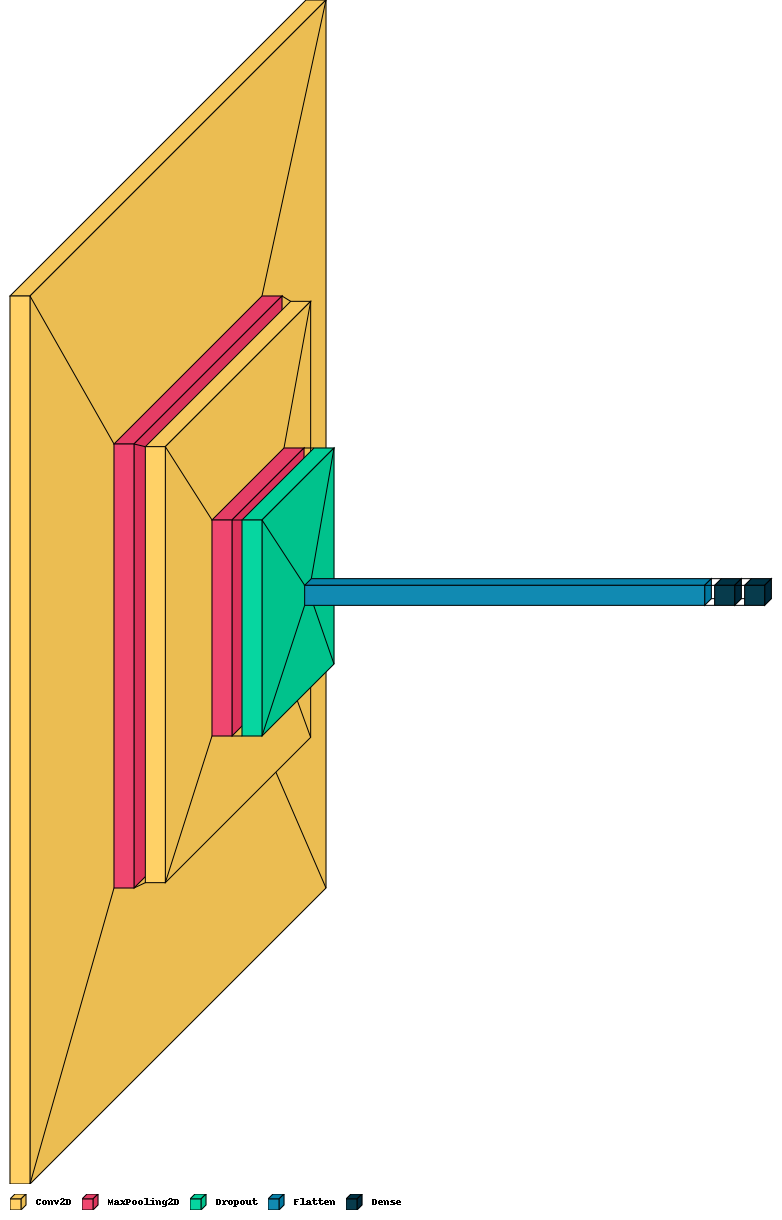

In [ ]:
import visualkeras

visualkeras.layered_view(model,legend=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 flatten (Flatten)           (None, 186624)            0

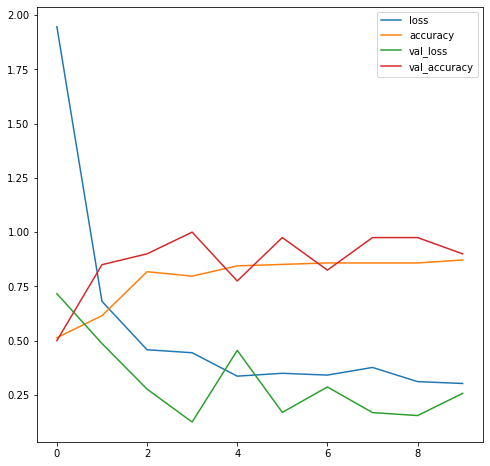

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,8))

In [ ]:
import numpy as np
import cv2
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

images,label = validation_generator.next()
img,lab = images[0],label[0]
img = np.expand_dims(img,axis=0)

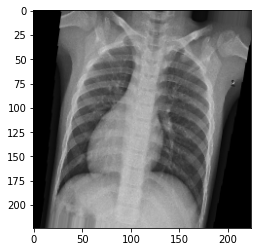

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(np.squeeze(img))

In [ ]:
p = model.predict(img)

In [ ]:
np.round(p[0][0]),lab

(0.0, 0.0)

In [ ]:
from keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = Model(inputs = model.input, outputs = layer_outputs)
activations = activation_model.predict(img)

In [ ]:
activations[0].shape

(1, 222, 222, 32)

In [ ]:
def plot(acti,rows,columns):
  fig = plt.figure(figsize=(10, 10))
  for i in range(1, columns*rows+1):
      img = acti[0, :, :, i-1]
      fig.add_subplot(rows, columns, i)
      plt.imshow(img,cmap="gray")
  plt.show()

first convolution all feature maps


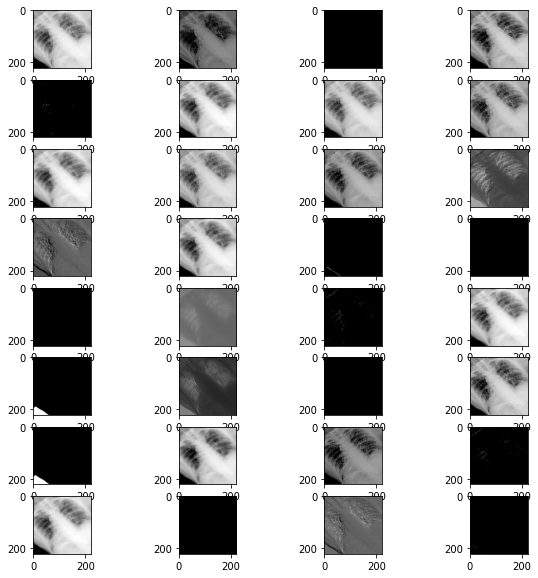

In [ ]:
print("first convolution all feature maps")
plot(activations[0],8,4)

first maxpool all feature maps


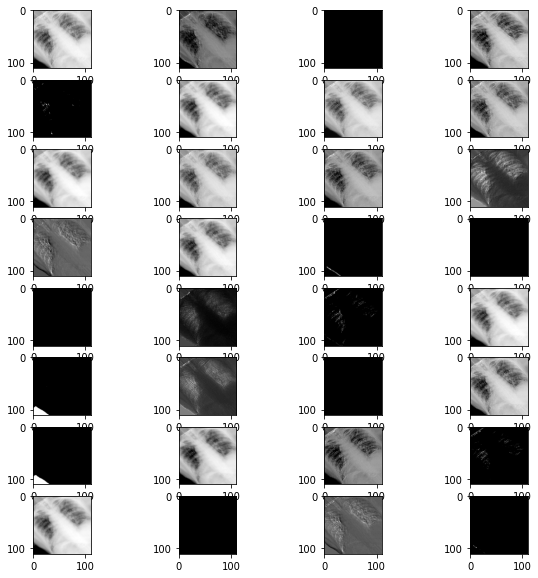

In [ ]:
print("first maxpool all feature maps")
plot(activations[1],8,4)

second convolution all feature maps


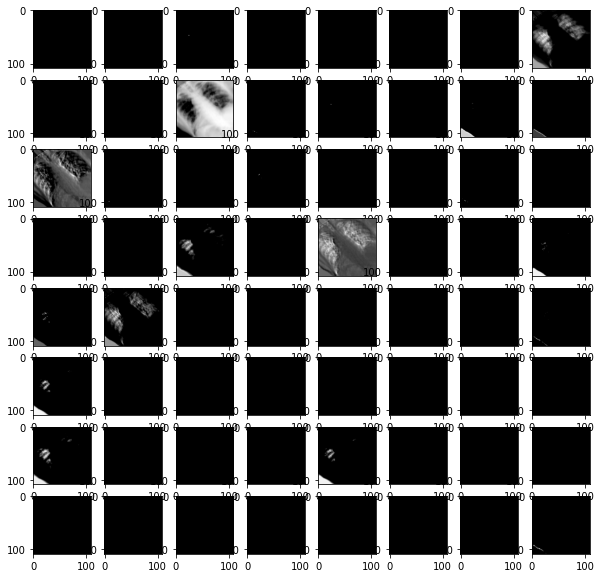

In [ ]:
print("second convolution all feature maps")
plot(activations[2],8,8)

second maxpool all feature maps


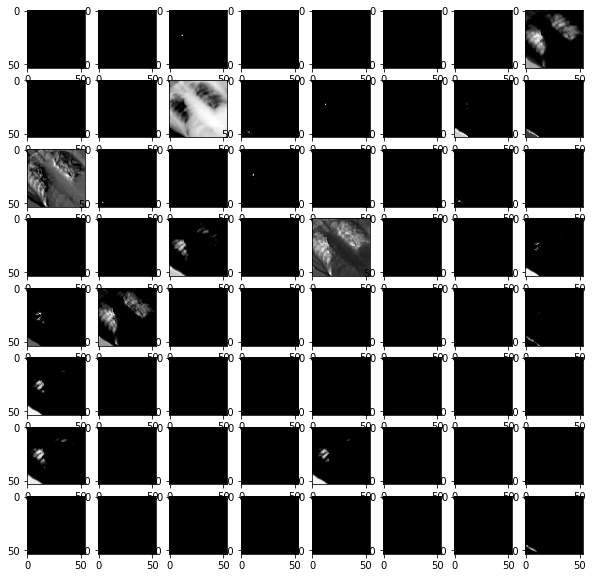

In [ ]:
print("second maxpool all feature maps")
plot(activations[3],8,8)

In [ ]:
model.evaluate(validation_generator,verbose=1)

7/7 [==============================] - 2s 307ms/step - loss: 0.1750 - accuracy: 0.9250


[0.17503972351551056, 0.925000011920929]

In [ ]:
#experimenting with other models
from tensorflow.keras.applications import Xception,VGG16,VGG19,ResNet50,InceptionV3,InceptionResNetV2,MobileNet,MobileNetV2

hist = []

In [ ]:
#Xception
model = Sequential()
pretrained_model= Xception(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=10,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"Xception"])

In [ ]:
#VGG16
model = Sequential()
pretrained_model= VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=10,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"VGG16"])

58900480/58889256 [==============================] - 0s 0us/step
Epoch 1/10
24/24 [==============================] - 128s 5s/step - loss: 0.6617 - accuracy: 0.7703 - val_loss: 0.2230 - val_accuracy: 0.9250
Epoch 2/10
24/24 [==============================] - 114s 5s/step - loss: 0.1475 - accuracy: 0.9392 - val_loss: 0.2994 - val_accuracy: 0.8750
Epoch 3/10
24/24 [==============================] - 104s 4s/step - loss: 0.1709 - accuracy: 0.9392 - val_loss: 0.2052 - val_accuracy: 0.8750
Epoch 4/10
24/24 [==============================] - 102s 4s/step - loss: 0.1180 - accuracy: 0.9392 - val_loss: 0.2911 - val_accuracy: 0.8750
Epoch 5/10
24/24 [==============================] - 103s 4s/step - loss: 0.2417 - accuracy: 0.9392 - val_loss: 0.0541 - val_accuracy: 0.9750
Epoch 6/10
24/24 [==============================] - 103s 4s/step - loss: 0.1530 - accuracy: 0.9392 - val_loss: 0.2280 - val_accuracy: 0.9500
Epoch 7/10
24/24 [==============================] - 102s 4s/step - loss: 0.1314 - accurac

In [ ]:
#VGG19
model = Sequential()
pretrained_model= VGG19(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=10,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"VGG19"])

80150528/80134624 [==============================] - 1s 0us/step
Epoch 1/10
24/24 [==============================] - 132s 5s/step - loss: 0.6596 - accuracy: 0.7162 - val_loss: 0.2029 - val_accuracy: 0.9500
Epoch 2/10
24/24 [==============================] - 128s 5s/step - loss: 0.3140 - accuracy: 0.8716 - val_loss: 0.1466 - val_accuracy: 0.9500
Epoch 3/10
24/24 [==============================] - 127s 5s/step - loss: 0.3596 - accuracy: 0.8378 - val_loss: 0.8730 - val_accuracy: 0.7000
Epoch 4/10
24/24 [==============================] - 127s 5s/step - loss: 0.1643 - accuracy: 0.9324 - val_loss: 0.1421 - val_accuracy: 0.9250
Epoch 5/10
24/24 [==============================] - 128s 5s/step - loss: 0.1926 - accuracy: 0.9324 - val_loss: 0.3303 - val_accuracy: 0.8250
Epoch 6/10
24/24 [==============================] - 132s 5s/step - loss: 0.1440 - accuracy: 0.9459 - val_loss: 0.2522 - val_accuracy: 0.9000
Epoch 7/10
24/24 [==============================] - 132s 5s/step - loss: 0.1200 - accurac

In [ ]:
#ResNet50
model = Sequential()
pretrained_model= ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=10,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"ResNet50"])

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/10
24/24 [==============================] - 46s 2s/step - loss: 3.1263 - accuracy: 0.5270 - val_loss: 0.7113 - val_accuracy: 0.5000
Epoch 2/10
24/24 [==============================] - 39s 2s/step - loss: 0.6990 - accuracy: 0.4595 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
24/24 [==============================] - 39s 2s/step - loss: 0.7026 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4750
Epoch 4/10
24/24 [==============================] - 39s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
24/24 [==============================] - 40s 2s/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
24/24 [==============================] - 40s 2s/step - loss: 0.7075 - accuracy: 0.4865 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
24/24 [==============================] - 40s 2s/step - loss: 0.7013 - accuracy: 0.51

In [ ]:
#InceptionV3
model = Sequential()
pretrained_model= InceptionV3(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=10,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"InceptionV3"])

87924736/87910968 [==============================] - 0s 0us/step
Epoch 1/10
24/24 [==============================] - 35s 1s/step - loss: 10.6129 - accuracy: 0.6892 - val_loss: 2.0825 - val_accuracy: 0.8500
Epoch 2/10
24/24 [==============================] - 28s 1s/step - loss: 2.3199 - accuracy: 0.8514 - val_loss: 0.9148 - val_accuracy: 0.9000
Epoch 3/10
24/24 [==============================] - 28s 1s/step - loss: 0.5151 - accuracy: 0.9527 - val_loss: 0.7917 - val_accuracy: 0.9500
Epoch 4/10
24/24 [==============================] - 28s 1s/step - loss: 0.5726 - accuracy: 0.9189 - val_loss: 1.1395 - val_accuracy: 0.9000
Epoch 5/10
24/24 [==============================] - 28s 1s/step - loss: 2.0816 - accuracy: 0.8649 - val_loss: 4.9675 - val_accuracy: 0.8000
Epoch 6/10
24/24 [==============================] - 28s 1s/step - loss: 1.0798 - accuracy: 0.9189 - val_loss: 1.3598 - val_accuracy: 0.9000
Epoch 7/10
24/24 [==============================] - 28s 1s/step - loss: 1.1340 - accuracy: 0.9

In [ ]:
#InceptionResNetV2
model = Sequential()
pretrained_model= InceptionResNetV2(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=10,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"InceptionResNetV2"])

219070464/219055592 [==============================] - 1s 0us/step
Epoch 1/10
24/24 [==============================] - 68s 2s/step - loss: 5.5593 - accuracy: 0.7365 - val_loss: 2.6263 - val_accuracy: 0.9500
Epoch 2/10
24/24 [==============================] - 53s 2s/step - loss: 2.7147 - accuracy: 0.8919 - val_loss: 2.7286 - val_accuracy: 0.9000
Epoch 3/10
24/24 [==============================] - 53s 2s/step - loss: 1.2878 - accuracy: 0.9527 - val_loss: 1.6603 - val_accuracy: 0.9250
Epoch 4/10
24/24 [==============================] - 53s 2s/step - loss: 0.4472 - accuracy: 0.9662 - val_loss: 4.3829 - val_accuracy: 0.9000
Epoch 5/10
24/24 [==============================] - 53s 2s/step - loss: 3.0225 - accuracy: 0.9189 - val_loss: 3.0458 - val_accuracy: 0.9250
Epoch 6/10
24/24 [==============================] - 53s 2s/step - loss: 2.1964 - accuracy: 0.9054 - val_loss: 5.1178 - val_accuracy: 0.9000
Epoch 7/10
24/24 [==============================] - 53s 2s/step - loss: 1.1938 - accuracy: 0.

In [ ]:
#MobileNet
model = Sequential()
pretrained_model= MobileNet(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=10,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"MobileNet"])

17235968/17225924 [==============================] - 0s 0us/step
Epoch 1/10
24/24 [==============================] - 17s 595ms/step - loss: 7.3981 - accuracy: 0.7838 - val_loss: 0.0952 - val_accuracy: 0.9750
Epoch 2/10
24/24 [==============================] - 14s 571ms/step - loss: 1.2105 - accuracy: 0.9662 - val_loss: 1.6683 - val_accuracy: 0.9500
Epoch 3/10
24/24 [==============================] - 14s 575ms/step - loss: 0.7035 - accuracy: 0.9797 - val_loss: 1.9474 - val_accuracy: 0.9500
Epoch 4/10
24/24 [==============================] - 14s 573ms/step - loss: 0.5072 - accuracy: 0.9730 - val_loss: 1.5864 - val_accuracy: 0.9500
Epoch 5/10
24/24 [==============================] - 14s 567ms/step - loss: 1.4267 - accuracy: 0.9527 - val_loss: 2.9396e-08 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 14s 570ms/step - loss: 1.9518 - accuracy: 0.9459 - val_loss: 1.0471 - val_accuracy: 0.9750
Epoch 7/10
24/24 [==============================] - 14s 570ms/step - loss

In [ ]:
#MobileNetV2
model = Sequential()
pretrained_model= MobileNetV2(include_top=False,input_shape=(224,224,3),weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator,steps_per_epoch=148/6,epochs=10,validation_data=validation_generator,validation_steps=40/6,verbose=1)
h = model.evaluate(validation_generator,verbose=1)
hist.append([h[0],h[1],"MobileNetV2"])

9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/10
24/24 [==============================] - 19s 649ms/step - loss: 4.4200 - accuracy: 0.8311 - val_loss: 0.2355 - val_accuracy: 0.9500
Epoch 2/10
24/24 [==============================] - 14s 540ms/step - loss: 1.5267 - accuracy: 0.9392 - val_loss: 0.0488 - val_accuracy: 0.9750
Epoch 3/10
24/24 [==============================] - 13s 544ms/step - loss: 1.3338 - accuracy: 0.9189 - val_loss: 0.6212 - val_accuracy: 0.9250
Epoch 4/10
24/24 [==============================] - 14s 548ms/step - loss: 1.7232 - accuracy: 0.9257 - val_loss: 2.6330 - val_accuracy: 0.9250
Epoch 5/10
24/24 [==============================] - 13s 544ms/step - loss: 0.9160 - accuracy: 0.9324 - val_loss: 2.5630 - val_accuracy: 0.9000
Epoch 6/10
24/24 [==============================] - 13s 543ms/step - loss: 0.0321 - accuracy: 0.9865 - val_loss: 1.5211 - val_accuracy: 0.9000
Epoch 7/10
24/24 [==============================] - 13s 539ms/step - loss: 0.52

In [ ]:
#we forgot to add results of our custom model so
hist.append([0.17503972351551056, 0.925000011920929,"Custom"])

In [ ]:
import pandas as pd
df = pd.DataFrame(hist)
df.columns = ["loss","accuracy","model_name"]

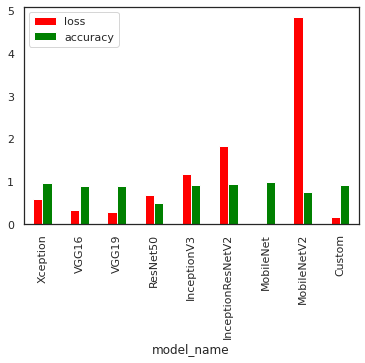

In [ ]:
import seaborn as sns
sns.set(style='white')
df.set_index('model_name').plot(kind='bar',color=['red', 'green'])